# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the Data for ML Project

In [67]:
df = pd.read_excel('C:/Users/aksin52/Documents/Webinar_Customer_Segmentation/train.xlsx')

In [68]:
df.shape

(69713, 23)

In [69]:
df.head()

,ID,Gender,DOB,Lead_Creation_Date,City_Code,City_Category,Employer_Code,Employer_Category1,Employer_Category2,Monthly_Income,Customer_Existing_Primary_Bank_Code,Primary_Bank_Type,Contacted,Source,Source_Category,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Approved,loan_amt_cl
0,APPC90493171225,Female,1979-07-23,2016-07-15,C10001,A,COM0044082,A,4.0,2000.0,B001,P,N,S122,G,0.0,NaN,NaN,NaN,NaN,0,0,0
1,APPD40611263344,Male,1986-12-07,2016-07-04,C10003,A,COM0000002,C,1.0,3500.0,B002,P,Y,S122,G,0.0,20000.0,2.0,13.25,953.0,10,0,20000
2,APPE70289249423,Male,1982-12-10,2016-07-19,C10125,C,COM0005267,C,4.0,2250.0,B003,G,Y,S143,B,0.0,45000.0,4.0,NaN,NaN,0,0,45000
3,APPF80273865537,Male,1989-01-30,2016-07-09,C10477,C,COM0004143,A,4.0,3500.0,B003,G,Y,S143,B,0.0,92000.0,5.0,NaN,NaN,7,0,92000
4,APPG60994436641,Male,1985-04-19,2016-07-20,C10002,A,COM0001781,A,4.0,10000.0,B001,P,Y,S134,B,2500.0,50000.0,2.0,NaN,NaN,10,0,50000


In [70]:
df.dtypes

ID                                             object
Gender                                         object
DOB                                    datetime64[ns]
Lead_Creation_Date                     datetime64[ns]
City_Code                                      object
City_Category                                  object
Employer_Code                                  object
Employer_Category1                             object
Employer_Category2                            float64
Monthly_Income                                float64
Customer_Existing_Primary_Bank_Code            object
Primary_Bank_Type                              object
Contacted                                      object
Source                                         object
Source_Category                                object
Existing_EMI                                  float64
Loan_Amount                                   float64
Loan_Period                                   float64
Interest_Rate               

# Setting Display options to ensure feature name visibility

In [71]:
pd.set_option('display.max_columns',None)

# Warning Suppression 

In [72]:
import warnings
warnings.filterwarnings('ignore')

# Drop ID

In [73]:
df=df.drop(['ID'],axis=1)

# Defining Target and Independent Features

In [74]:
Y=df[['Approved']]

X=df.drop(['Approved'],axis=1)

# Get the Event Rate

In [75]:
Y.mean()

Approved    0.014631
dtype: float64

In [76]:
X['DOB'].max()

Timestamp('1999-02-24 00:00:00')

In [77]:
X['Lead_Creation_Date'].max()

Timestamp('2016-09-30 00:00:00')

# process date features

In [79]:
import datetime
reference_date_dob = df.DOB.max() + datetime.timedelta(days = 6458)
print('Reference Date for Age:', reference_date_dob)

reference_date_lead = df.Lead_Creation_Date.max() + datetime.timedelta(days = 30)
print('Reference Date for Lead Creation:', reference_date_lead)


Reference Date for Age: 2016-10-30 00:00:00
Reference Date for Lead Creation: 2016-10-30 00:00:00


In [80]:
X['age'] = (reference_date_dob - X.DOB).astype('timedelta64[Y]')
X['lead_age']=(reference_date_lead - X.Lead_Creation_Date).astype('timedelta64[M]')

X=X.drop(['DOB','Lead_Creation_Date'],axis=1)
X.head()

,Gender,City_Code,City_Category,Employer_Code,Employer_Category1,Employer_Category2,Monthly_Income,Customer_Existing_Primary_Bank_Code,Primary_Bank_Type,Contacted,Source,Source_Category,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,loan_amt_cl,age,lead_age
0,Female,C10001,A,COM0044082,A,4.0,2000.0,B001,P,N,S122,G,0.0,NaN,NaN,NaN,NaN,0,0,37.0,3.0
1,Male,C10003,A,COM0000002,C,1.0,3500.0,B002,P,Y,S122,G,0.0,20000.0,2.0,13.25,953.0,10,20000,29.0,3.0
2,Male,C10125,C,COM0005267,C,4.0,2250.0,B003,G,Y,S143,B,0.0,45000.0,4.0,NaN,NaN,0,45000,33.0,3.0
3,Male,C10477,C,COM0004143,A,4.0,3500.0,B003,G,Y,S143,B,0.0,92000.0,5.0,NaN,NaN,7,92000,27.0,3.0
4,Male,C10002,A,COM0001781,A,4.0,10000.0,B001,P,Y,S134,B,2500.0,50000.0,2.0,NaN,NaN,10,50000,31.0,3.0


In [81]:
X.dtypes

Gender                                  object
City_Code                               object
City_Category                           object
Employer_Code                           object
Employer_Category1                      object
Employer_Category2                     float64
Monthly_Income                         float64
Customer_Existing_Primary_Bank_Code     object
Primary_Bank_Type                       object
Contacted                               object
Source                                  object
Source_Category                         object
Existing_EMI                           float64
Loan_Amount                            float64
Loan_Period                            float64
Interest_Rate                          float64
EMI                                    float64
Var1                                     int64
loan_amt_cl                              int64
age                                    float64
lead_age                               float64
dtype: object

# Split features into Numerical and Categorical

In [82]:
num=X.select_dtypes(include="number")
char=X.select_dtypes(include="object")

In [83]:
num.dtypes

Employer_Category2    float64
Monthly_Income        float64
Existing_EMI          float64
Loan_Amount           float64
Loan_Period           float64
Interest_Rate         float64
EMI                   float64
Var1                    int64
loan_amt_cl             int64
age                   float64
lead_age              float64
dtype: object

In [84]:
char.dtypes

Gender                                 object
City_Code                              object
City_Category                          object
Employer_Code                          object
Employer_Category1                     object
Customer_Existing_Primary_Bank_Code    object
Primary_Bank_Type                      object
Contacted                              object
Source                                 object
Source_Category                        object
dtype: object

In [85]:
def unique_levels(x):
    x=x.value_counts().count()
    return(x)
df_value_counts=pd.DataFrame(num.apply(lambda x : unique_levels(x)))
df_value_counts

,0
Employer_Category2,4
Monthly_Income,5010
Existing_EMI,3245
Loan_Amount,196
Loan_Period,6
Interest_Rate,72
EMI,2179
Var1,5
loan_amt_cl,197
age,61


In [86]:
df_value_counts.columns=['feature_levels']
df_value_counts

,feature_levels
Employer_Category2,4
Monthly_Income,5010
Existing_EMI,3245
Loan_Amount,196
Loan_Period,6
Interest_Rate,72
EMI,2179
Var1,5
loan_amt_cl,197
age,61


In [87]:
slice1=df_value_counts.loc[df_value_counts['feature_levels']<=20]
cat_list=slice1.index
cat=num.loc[:,cat_list]
cat.dtypes

Employer_Category2    float64
Loan_Period           float64
Var1                    int64
lead_age              float64
dtype: object

In [88]:
slice2=df_value_counts.loc[df_value_counts['feature_levels']>20]
num_list=slice2.index
num=num.loc[:,num_list]

In [89]:
char=pd.concat([char,cat],axis=1,join="inner")

In [90]:
char.head()

,Gender,City_Code,City_Category,Employer_Code,Employer_Category1,Customer_Existing_Primary_Bank_Code,Primary_Bank_Type,Contacted,Source,Source_Category,Employer_Category2,Loan_Period,Var1,lead_age
0,Female,C10001,A,COM0044082,A,B001,P,N,S122,G,4.0,NaN,0,3.0
1,Male,C10003,A,COM0000002,C,B002,P,Y,S122,G,1.0,2.0,10,3.0
2,Male,C10125,C,COM0005267,C,B003,G,Y,S143,B,4.0,4.0,0,3.0
3,Male,C10477,C,COM0004143,A,B003,G,Y,S143,B,4.0,5.0,7,3.0
4,Male,C10002,A,COM0001781,A,B001,P,Y,S134,B,4.0,2.0,10,3.0


In [91]:
num.head()

,Monthly_Income,Existing_EMI,Loan_Amount,Interest_Rate,EMI,loan_amt_cl,age
0,2000.0,0.0,NaN,NaN,NaN,0,37.0
1,3500.0,0.0,20000.0,13.25,953.0,20000,29.0
2,2250.0,0.0,45000.0,NaN,NaN,45000,33.0
3,3500.0,0.0,92000.0,NaN,NaN,92000,27.0
4,10000.0,2500.0,50000.0,NaN,NaN,50000,31.0


# Outlier Analysis of Numerical Features

In [92]:
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99])

,Monthly_Income,Existing_EMI,Loan_Amount,Interest_Rate,EMI,loan_amt_cl,age
count,6.971300e+04,69662.000000,42004.000000,22276.000000,22276.000000,69713.000000,69698.000000
mean,5.622283e+03,360.928751,39429.982859,19.213570,1101.466242,23757.649219,30.601696
std,1.747671e+05,2288.517927,30727.595990,5.847136,752.661394,30679.558166,7.093660
min,0.000000e+00,0.000000,5000.000000,11.990000,118.000000,0.000000,17.000000
1%,2.841040e+02,0.000000,6000.000000,13.000000,241.000000,0.000000,20.000000
5%,1.000000e+03,0.000000,10000.000000,13.500000,344.000000,0.000000,22.000000
10%,1.200000e+03,0.000000,10000.000000,13.990000,409.000000,0.000000,24.000000
25%,1.650000e+03,0.000000,20000.000000,15.250000,649.000000,0.000000,26.000000
50%,2.500000e+03,0.000000,30000.000000,18.000000,941.000000,15000.000000,29.000000
75%,4.000000e+03,350.000000,50000.000000,20.000000,1295.000000,36000.000000,33.000000


# Capping and Flooring of outliers

In [93]:
def outlier_cap(x):
    x=x.clip(lower=x.quantile(0.01))
    x=x.clip(upper=x.quantile(0.99))
    return(x)

In [94]:
num=num.apply(lambda x : outlier_cap(x))

In [95]:
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99])

,Monthly_Income,Existing_EMI,Loan_Amount,Interest_Rate,EMI,loan_amt_cl,age
count,69713.000000,69662.000000,42004.000000,22276.000000,22276.000000,69713.000000,69698.000000
mean,3482.197794,326.587792,39172.578802,19.216630,1094.206949,23598.654483,30.574665
std,3540.702844,719.307635,29425.102041,5.843624,708.555001,29821.540909,6.946104
min,284.104000,0.000000,6000.000000,13.000000,241.000000,0.000000,20.000000
1%,284.811520,0.000000,6000.000000,13.000000,241.000000,0.000000,20.000000
5%,1000.000000,0.000000,10000.000000,13.500000,344.000000,0.000000,22.000000
10%,1200.000000,0.000000,10000.000000,13.990000,409.000000,0.000000,24.000000
25%,1650.000000,0.000000,20000.000000,15.250000,649.000000,0.000000,26.000000
50%,2500.000000,0.000000,30000.000000,18.000000,941.000000,15000.000000,29.000000
75%,4000.000000,350.000000,50000.000000,20.000000,1295.000000,36000.000000,33.000000


# Missing Value Analysis

In [96]:
num.isnull().mean()

Monthly_Income    0.000000
Existing_EMI      0.000732
Loan_Amount       0.397472
Interest_Rate     0.680461
EMI               0.680461
loan_amt_cl       0.000000
age               0.000215
dtype: float64

In [97]:
num = num.loc[:,num.isnull().mean() <= .25]

In [98]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
num_1=pd.DataFrame(imputer.fit_transform(num),index=num.index,columns=num.columns)

In [99]:
num_1.isnull().mean()

Monthly_Income    0.0
Existing_EMI      0.0
loan_amt_cl       0.0
age               0.0
dtype: float64

In [100]:
char.isnull().mean()

Gender                                 0.000000
City_Code                              0.011676
City_Category                          0.011676
Employer_Code                          0.057636
Employer_Category1                     0.057636
Customer_Existing_Primary_Bank_Code    0.134709
Primary_Bank_Type                      0.134709
Contacted                              0.000000
Source                                 0.000000
Source_Category                        0.000000
Employer_Category2                     0.061653
Loan_Period                            0.397472
Var1                                   0.000000
lead_age                               0.000000
dtype: float64

In [101]:
char = char.loc[:,char.isnull().mean() <= .25]

In [102]:
def unique_levels(x):
    x=x.value_counts().count()
    return(x)
char_value_counts=pd.DataFrame(char.apply(lambda x : unique_levels(x)))
char_value_counts

,0
Gender,2
City_Code,678
City_Category,3
Employer_Code,36617
Employer_Category1,3
Customer_Existing_Primary_Bank_Code,57
Primary_Bank_Type,2
Contacted,2
Source,29
Source_Category,7


In [103]:
char=char.drop(['City_Code','Employer_Code'],axis=1)

In [146]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
char_1=pd.DataFrame(imputer.fit_transform(char),index=char.index,columns=char.columns)

In [105]:
char_1.isnull().mean()

Gender                                 0.0
City_Category                          0.0
Employer_Category1                     0.0
Customer_Existing_Primary_Bank_Code    0.0
Primary_Bank_Type                      0.0
Contacted                              0.0
Source                                 0.0
Source_Category                        0.0
Employer_Category2                     0.0
Var1                                   0.0
lead_age                               0.0
dtype: float64

# Feature Selection - Numerical Features 

# Part 1 : Remove Features with 0 Variance

In [106]:
from sklearn.feature_selection import VarianceThreshold

varselector= VarianceThreshold(threshold=0)
varselector.fit_transform(num_1)
# Get columns to keep and create new dataframe with those only
cols = varselector.get_support(indices=True)
num_1 = num_1.iloc[:,cols]

In [107]:
num_1.iloc[0]

Monthly_Income    2000.0
Existing_EMI         0.0
loan_amt_cl          0.0
age                 37.0
Name: 0, dtype: float64

In [ ]:
num_1.isnull().sum()

# Part 2 - Bi Variate Analysis (Feature Discretization)

In [108]:
from sklearn.preprocessing import KBinsDiscretizer
discrete=KBinsDiscretizer(n_bins=10,encode='ordinal', strategy='quantile')
num_binned=pd.DataFrame(discrete.fit_transform(num_1),index=num_1.index, columns=num_1.columns).add_suffix('_Rank')
num_binned.head()

,Monthly_Income_Rank,Existing_EMI_Rank,loan_amt_cl_Rank,age_Rank
0,3.0,0.0,0.0,8.0
1,7.0,0.0,2.0,5.0
2,4.0,0.0,5.0,7.0
3,7.0,0.0,6.0,3.0
4,9.0,3.0,5.0,6.0


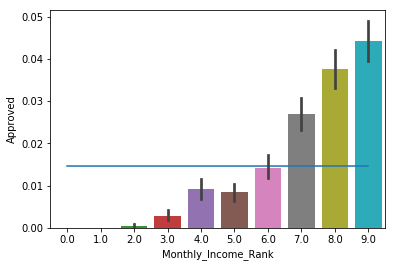

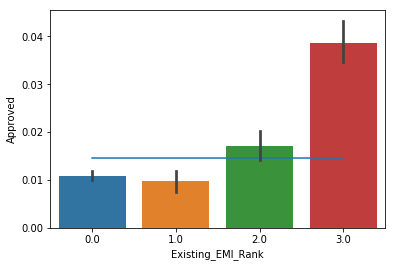

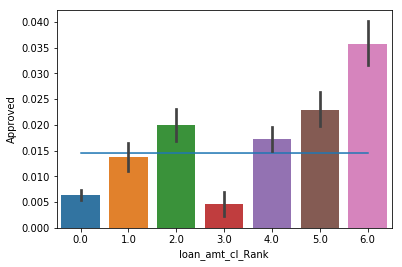

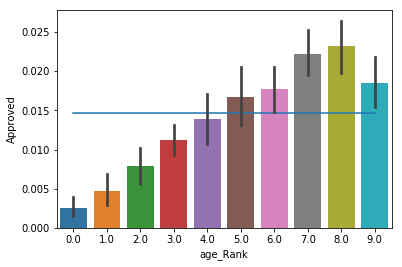

In [109]:
#Check if the features show a slope at all
#If they do, then do you see some deciles below the population average and some higher than population average?
#If that is the case then the slope will be strong
#Conclusion: A strong slope is indicative of the features' ability to discriminate the event from non event
#            making it a good predictor


X_bin_combined=pd.concat([Y,num_binned],axis=1,join='inner')

from numpy import mean
for col in (num_binned.columns):
    plt.figure()
    sns.lineplot(x=col,y=X_bin_combined['Approved'].mean(),data=X_bin_combined)
    sns.barplot(x=col, y="Approved",data=X_bin_combined, estimator=mean )
plt.show()

In [110]:
# All features from num_1 will get selected due to good discrimination power by all of them
select_features_df_num=num_1

In [111]:
select_features_df_num.shape

(69713, 4)

# Feature Selection - Categorical Features 

# Part 1 - Bi Variate Analysis

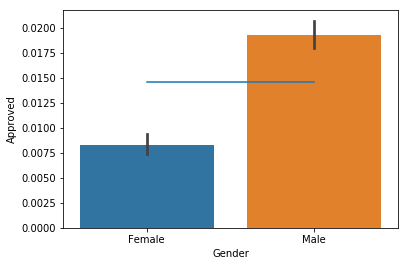

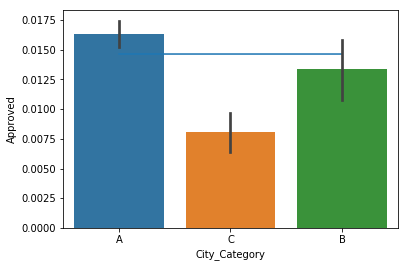

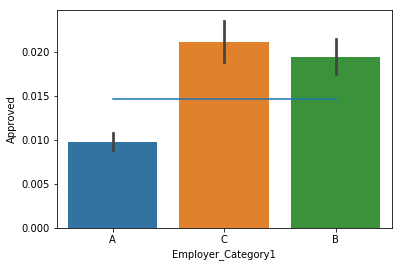

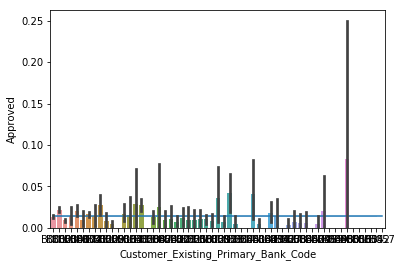

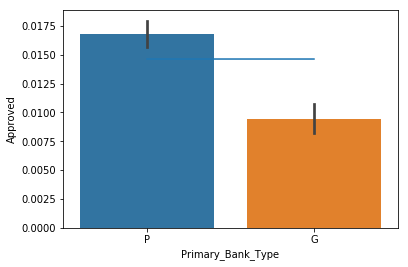

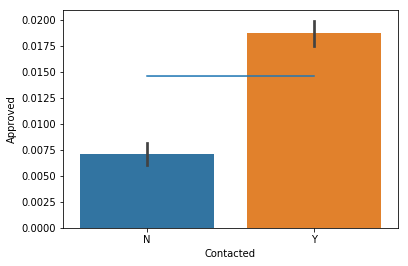

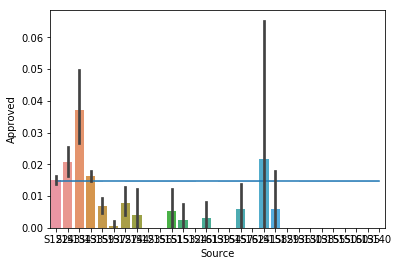

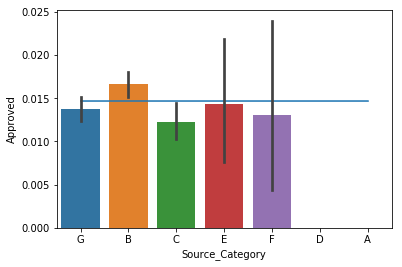

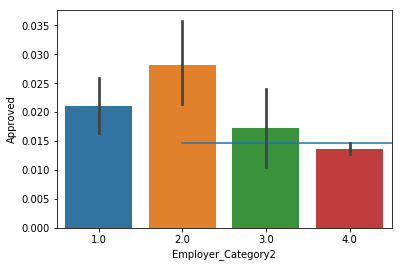

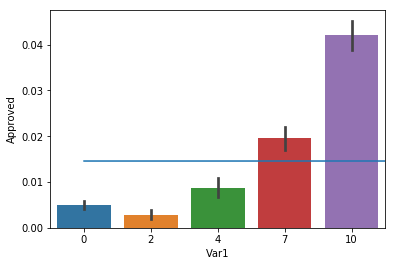

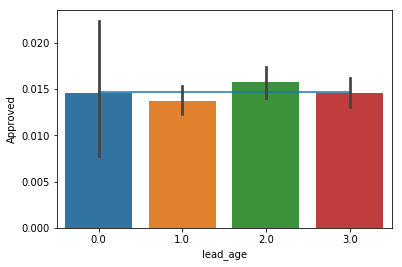

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns
X_char_merged=pd.concat([Y,char_1],axis=1,join='inner')

from numpy import mean
for col in (char.columns):
    plt.figure()
    sns.lineplot(x=col,y=X_char_merged['Approved'].mean(),data=X_char_merged)
    sns.barplot(x=col, y="Approved",data=X_char_merged, estimator=mean )
plt.show()

In [113]:
#char_1=char_1.drop(['Source','Customer_Existing_Primary_Bank_Code'],axis=1)

In [147]:
# Create dummy features with n-1 levels
X_char_dum = pd.get_dummies(char_1, drop_first = True)
X_char_dum.shape

(69713, 107)

# Part 2 - Select K Best

In [148]:
# Select K Best for Categorical Features
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k=105)
selector.fit_transform(X_char_dum, Y)
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
select_features_df_char = X_char_dum.iloc[:,cols]

In [149]:
select_features_df_char=X_char_dum

# Creating the Master Feature Set for Model Development

In [150]:
X_all=pd.concat([select_features_df_char,select_features_df_num],axis=1,join="inner")

In [118]:
X_all.shape

(69713, 27)

In [119]:
X_all.head()

,Gender_Male,City_Category_B,City_Category_C,Employer_Category1_B,Employer_Category1_C,Primary_Bank_Type_P,Contacted_Y,Source_Category_B,Source_Category_C,Source_Category_D,Source_Category_E,Source_Category_F,Source_Category_G,Employer_Category2_2.0,Employer_Category2_3.0,Employer_Category2_4.0,Var1_2,Var1_4,Var1_7,Var1_10,lead_age_1.0,lead_age_2.0,lead_age_3.0,Monthly_Income,Existing_EMI,loan_amt_cl,age
0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,2000.0,0.0,0.0,37.0
1,1,0,0,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,3500.0,0.0,20000.0,29.0
2,1,0,1,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,2250.0,0.0,45000.0,33.0
3,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,3500.0,0.0,92000.0,27.0
4,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,10000.0,2500.0,50000.0,31.0


# Train Test Split

In [151]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_all, Y, test_size=0.3, random_state=20)

In [152]:
print("Shape of Training Data",X_train.shape)
print("Shape of Testing Data",X_test.shape)
print("Response Rate in Training Data",y_train.mean())
print("Response Rate in Testing Data",y_test.mean())

Shape of Training Data (48799, 111)
Shape of Testing Data (20914, 111)
Response Rate in Training Data Approved    0.01457
dtype: float64
Response Rate in Testing Data Approved    0.014775
dtype: float64


# Model Building Step

In [130]:
import statsmodels.api as sm
log_reg = sm.Logit(y_train, X_train).fit()
print(log_reg.summary())

         Current function value: 0.066672
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:               Approved   No. Observations:                48799
Model:                          Logit   Df Residuals:                    48772
Method:                           MLE   Df Model:                           26
Date:                Thu, 24 Jun 2021   Pseudo R-squ.:                  0.1236
Time:                        21:07:04   Log-Likelihood:                -3253.5
converged:                      False   LL-Null:                       -3712.5
                                        LLR p-value:                8.997e-177
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Gender_Male                0.1593      0.142      1.125      0.260      -0.118       0.437
City_Category_B            0.

In [153]:
# Building a Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion='gini',random_state=0)

In [154]:
dtree=DecisionTreeClassifier(criterion='gini',random_state=0,max_depth=4,min_samples_split=500)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, min_samples_split=500, random_state=0)

In [ ]:
!pip install pydotplus

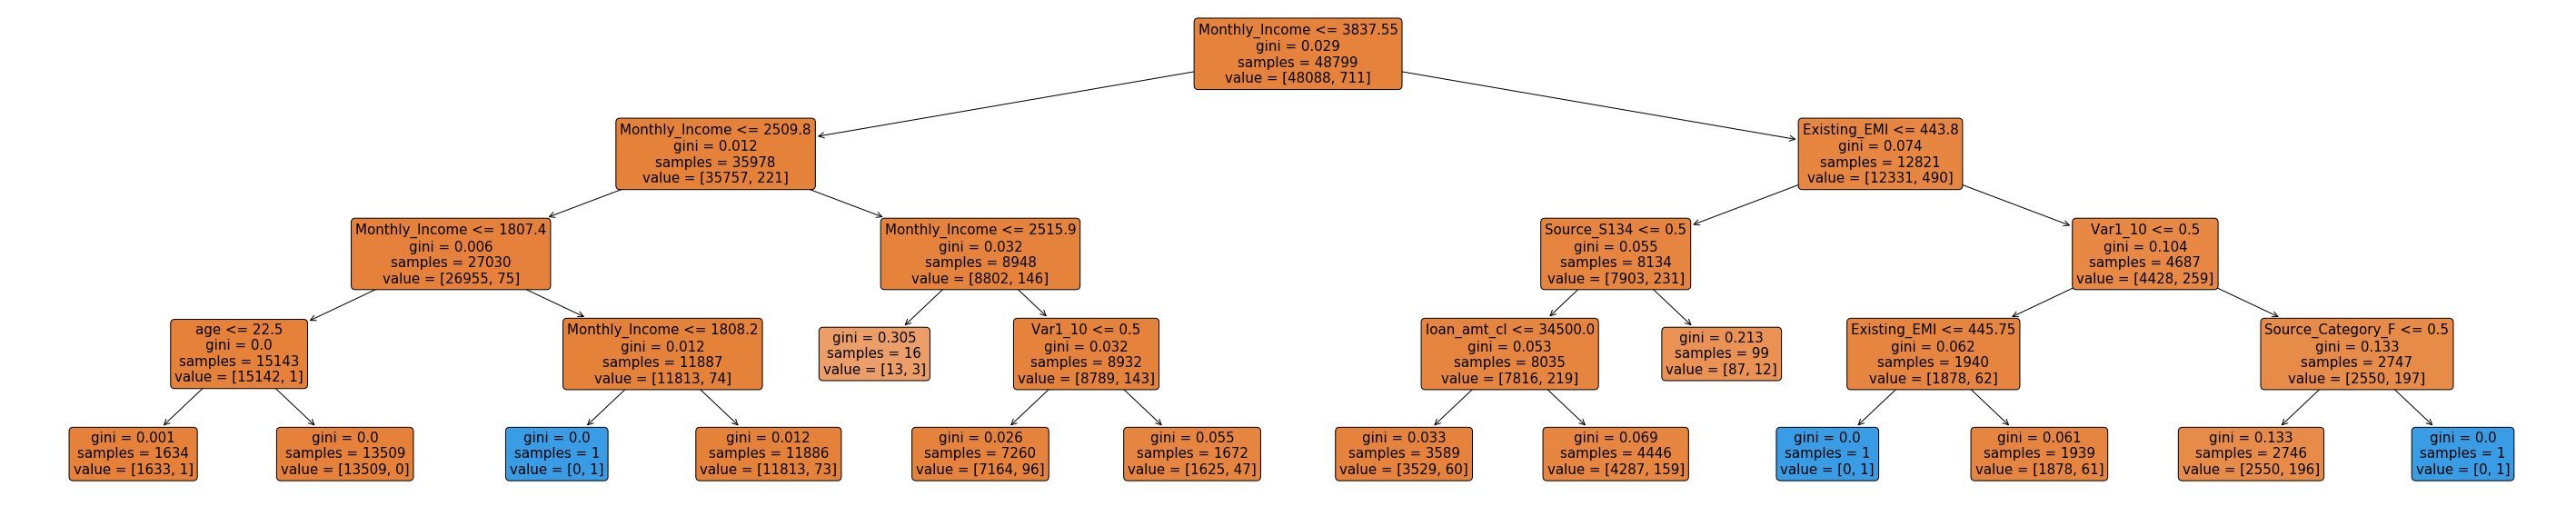

In [163]:
from sklearn import tree
import pydotplus
import matplotlib.pyplot as plt
plt.figure(figsize=[50,10])
tree.plot_tree(dtree,filled=True,fontsize=15,rounded=True,feature_names=X_all.columns)
plt.show()

In [155]:
# Model Evaluation
y_pred_tree=dtree.predict(X_test)

In [140]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [156]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_tree))
print("Precision",metrics.precision_score(y_test,y_pred_tree))
print("Recall",metrics.recall_score(y_test,y_pred_tree))
print("f1_score",metrics.f1_score(y_test,y_pred_tree))

Accuracy: 0.9852252079946447
Precision 0.0
Recall 0.0
f1_score 0.0


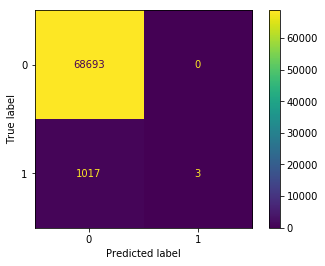

In [157]:
metrics.plot_confusion_matrix(dtree,X_all,Y)

In [ ]:
# Gains Chart Analysis
# This will help understand the power of discrimination offered by the model's estimated probabilities

In [ ]:
# Logistic Regression - Gains Chart

In [169]:
y_pred_prob = dtree.predict_proba(X_all)[:, 1]
df['pred_prob_dtree']=pd.DataFrame(y_pred_prob)
df['P_Rank_tree']=pd.qcut(df['pred_prob_dtree'].rank(method='first').values,20,duplicates='drop').codes+1
rank_df_actuals=df.groupby('P_Rank_tree')['Approved'].agg(['count','mean'])
rank_df_predicted=df.groupby('P_Rank_tree')['pred_prob_dtree'].agg(['mean'])
rank_df_actuals=pd.DataFrame(rank_df_actuals)

rank_df_actuals.rename(columns={'mean':'Actual_event_rate'},inplace=True)
rank_df_predicted=pd.DataFrame(rank_df_predicted)

rank_df_predicted.rename(columns={'mean':'Predicted_event_rate'},inplace=True)
rank_df=pd.concat([rank_df_actuals,rank_df_predicted],axis=1,join="inner")

sorted_rank_df=rank_df.sort_values(by='P_Rank_tree',ascending=False)
sorted_rank_df['N_events']=rank_df['count']*rank_df['Actual_event_rate']
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum()
sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()

sorted_rank_df['N_non_events']=sorted_rank_df['count']-sorted_rank_df['N_events']
sorted_rank_df['cum_non_events']=sorted_rank_df['N_non_events'].cumsum()
sorted_rank_df['non_event_cap']=sorted_rank_df['N_non_events']/max(sorted_rank_df['N_non_events'].cumsum())
sorted_rank_df['cum_non_event_cap']=sorted_rank_df['non_event_cap'].cumsum()

sorted_rank_df['KS']=round((sorted_rank_df['cum_event_cap']-sorted_rank_df['cum_non_event_cap']),4)

sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum())
sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum()
sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed['Decile']=sorted_reindexed.index+1
sorted_reindexed

,P_Rank_tree,count,Actual_event_rate,Predicted_event_rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap,KS,random_cap,cum_random_cap,Decile
0,20,3486,0.071142,0.074981,248.0,248.0,0.243137,0.243137,3238.0,3238.0,0.047137,0.047137,0.1960,0.050005,0.050005,1
1,19,3486,0.046185,0.041882,161.0,409.0,0.157843,0.400980,3325.0,6563.0,0.048404,0.095541,0.3054,0.050005,0.100010,2
2,18,3485,0.031277,0.035712,109.0,518.0,0.106863,0.507843,3376.0,9939.0,0.049146,0.144687,0.3632,0.049991,0.150001,3
3,17,3486,0.033563,0.030739,117.0,635.0,0.114706,0.622549,3369.0,13308.0,0.049044,0.193732,0.4288,0.050005,0.200006,4
4,16,3485,0.019799,0.022017,69.0,704.0,0.067647,0.690196,3416.0,16724.0,0.049729,0.243460,0.4467,0.049991,0.249996,5
5,15,3486,0.022949,0.016507,80.0,784.0,0.078431,0.768627,3406.0,20130.0,0.049583,0.293043,0.4756,0.050005,0.300001,6
6,14,3486,0.012909,0.013223,45.0,829.0,0.044118,0.812745,3441.0,23571.0,0.050092,0.343135,0.4696,0.050005,0.350006,7
7,13,3485,0.012339,0.013223,43.0,872.0,0.042157,0.854902,3442.0,27013.0,0.050107,0.393242,0.4617,0.049991,0.399997,8
8,12,3486,0.012335,0.012571,43.0,915.0,0.042157,0.897059,3443.0,30456.0,0.050122,0.443364,0.4537,0.050005,0.450002,9
9,11,3485,0.004878,0.006142,17.0,932.0,0.016667,0.913725,3468.0,33924.0,0.050485,0.493849,0.4199,0.049991,0.499993,10


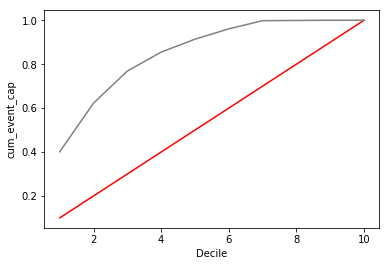

In [159]:
ax = sns.lineplot( x="Decile", y="cum_random_cap", data=sorted_reindexed,color='red')
ax = sns.lineplot( x="Decile", y="cum_event_cap", data=sorted_reindexed,color='grey')

In [160]:
df['Predicted_Approval_Rank']=np.where(df['P_Rank_tree']>=18,"Top 3","Bottom 7")

In [182]:
df['Predicted_Approval_Rank_2']=np.where(df['P_Rank_tree']>=18,"Top 3",np.where(df['P_Rank_tree']>=16,"Mid 2","Bottom Rest"))

In [184]:
df.groupby('Predicted_Approval_Rank_2')['Approved'].agg(['mean','count'])

,mean,count
Predicted_Approval_Rank_2,,
Bottom Rest,0.006044,52285
Mid 2,0.026682,6971
Top 3,0.049536,10457


### Concluding Notes
#### The business team can notify the Loan Approval team to essentially target the applications which fall under 'Top 3' followed by Mid 2 deciles